In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

In [3]:
강서_대여소_ID = pd.read_csv('../../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')
print(강서_대여소_ID)

      대여소_ID
0     ST-975
1     ST-837
2     ST-836
3     ST-835
4     ST-834
..       ...
219  ST-1066
220  ST-1065
221  ST-1064
222  ST-1063
223  ST-1062

[224 rows x 1 columns]


강서구 따릉이 이용 데이터 불러옴

In [4]:
강서_따릉이_데이터 = pd.read_csv('../../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
강서_따릉이_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
0,2023-05-08,200,ST-2037,ST-2037,1,1,30,0,0,0
1,2023-05-08,1155,ST-824,ST-824,1,1,80,0,0,0
2,2023-05-08,1230,ST-829,ST-829,1,1,111,0,0,0
3,2023-05-08,1340,ST-2611,ST-2611,1,1,10,0,0,0
4,2023-05-08,1635,ST-2031,ST-2031,1,1,170,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1739278,2023-12-06,2350,ST-2036,ST-1718,1,3,523,2,0,0
1739279,2023-12-06,2350,ST-2831,ST-1645,1,5,639,2,0,0
1739280,2023-12-06,2350,ST-1715,ST-2045,1,2,400,2,0,0
1739281,2023-12-06,2355,ST-1062,ST-2789,1,3,540,2,0,0


In [5]:
강서_따릉이_데이터.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739283 entries, 0 to 1739282
Data columns (total 10 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   기준_날짜      object
 1   기준_시간대     int64 
 2   시작_대여소_ID  object
 3   종료_대여소_ID  object
 4   전체_건수      int64 
 5   전체_이용_분    int64 
 6   전체_이용_거리   int64 
 7   요일         int64 
 8   주말         int64 
 9   휴일         int64 
dtypes: int64(7), object(3)
memory usage: 132.7+ MB


In [6]:
강서_따릉이_데이터['기준_날짜'] = pd.to_datetime(강서_따릉이_데이터['기준_날짜'])

In [7]:
강서_따릉이_데이터.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739283 entries, 0 to 1739282
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   기준_날짜      datetime64[ns]
 1   기준_시간대     int64         
 2   시작_대여소_ID  object        
 3   종료_대여소_ID  object        
 4   전체_건수      int64         
 5   전체_이용_분    int64         
 6   전체_이용_거리   int64         
 7   요일         int64         
 8   주말         int64         
 9   휴일         int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 132.7+ MB


In [8]:
# datetime에서 특정 조건 빼오기
# 강서_따릉이_데이터['기준_날짜'].dt.month

In [9]:
강서_따릉이_데이터.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739283 entries, 0 to 1739282
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   기준_날짜      datetime64[ns]
 1   기준_시간대     int64         
 2   시작_대여소_ID  object        
 3   종료_대여소_ID  object        
 4   전체_건수      int64         
 5   전체_이용_분    int64         
 6   전체_이용_거리   int64         
 7   요일         int64         
 8   주말         int64         
 9   휴일         int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 132.7+ MB


출근 시간, 퇴근 시간 이용 데이터만 남김

In [10]:
출근 = 강서_따릉이_데이터[(강서_따릉이_데이터['기준_시간대'] >= 600) & (강서_따릉이_데이터['기준_시간대'] <= 1000)]
퇴근 = 강서_따릉이_데이터[(강서_따릉이_데이터['기준_시간대'] >= 1700) & (강서_따릉이_데이터['기준_시간대'] <= 2100)]

In [11]:
출근

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
609,2023-05-08,600,ST-1253,ST-1676,1,10,1248,0,0,0
610,2023-05-08,600,ST-1253,ST-1718,1,3,762,0,0,0
611,2023-05-08,600,ST-1253,ST-2031,1,3,830,0,0,0
612,2023-05-08,600,ST-1254,ST-2858,1,4,1104,0,0,0
613,2023-05-08,600,ST-1351,ST-2550,1,8,2010,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1733236,2023-12-06,1000,ST-2557,ST-1249,1,5,870,2,0,0
1733237,2023-12-06,1000,ST-2056,ST-2049,1,1,270,2,0,0
1733238,2023-12-06,1000,ST-2045,ST-2042,1,4,746,2,0,0
1733239,2023-12-06,1000,ST-1251,ST-2044,1,8,1118,2,0,0


In [12]:
출근대여 = 출근.groupby(['기준_날짜', '시작_대여소_ID'])['전체_건수'].sum()

In [13]:
출근대여= 출근대여.reset_index()

In [14]:
퇴근

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,요일,주말,휴일
8,2023-05-08,1735,ST-834,ST-834,1,1,20,0,0,0
9,2023-05-08,1745,ST-1509,ST-1509,2,1,30,0,0,0
10,2023-05-08,1800,ST-2045,ST-2045,1,1,20,0,0,0
11,2023-05-08,1815,ST-533,ST-533,1,1,70,0,0,0
9021,2023-05-08,1700,ST-1062,ST-2486,1,2,250,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1738160,2023-12-06,2100,ST-3084,ST-1067,1,6,968,2,0,0
1738161,2023-12-06,2100,ST-511,ST-1645,1,7,1130,2,0,0
1738162,2023-12-06,2100,ST-2486,ST-2034,1,16,2492,2,0,0
1738163,2023-12-06,2100,ST-2045,ST-2037,1,7,1035,2,0,0


In [15]:
출근반납 = 출근.groupby(['기준_날짜', '종료_대여소_ID'])['전체_건수'].sum()

In [16]:
출근반납 = 출근반납.reset_index()

In [17]:
출근대여[:5]

,기준_날짜,시작_대여소_ID,전체_건수
0,2023-04-03,ST-1062,32
1,2023-04-03,ST-1063,61
2,2023-04-03,ST-1064,34
3,2023-04-03,ST-1065,57
4,2023-04-03,ST-1067,32


In [18]:
출근반납[:5]

,기준_날짜,종료_대여소_ID,전체_건수
0,2023-04-03,ST-1062,26
1,2023-04-03,ST-1063,54
2,2023-04-03,ST-1064,68
3,2023-04-03,ST-1065,51
4,2023-04-03,ST-1067,27


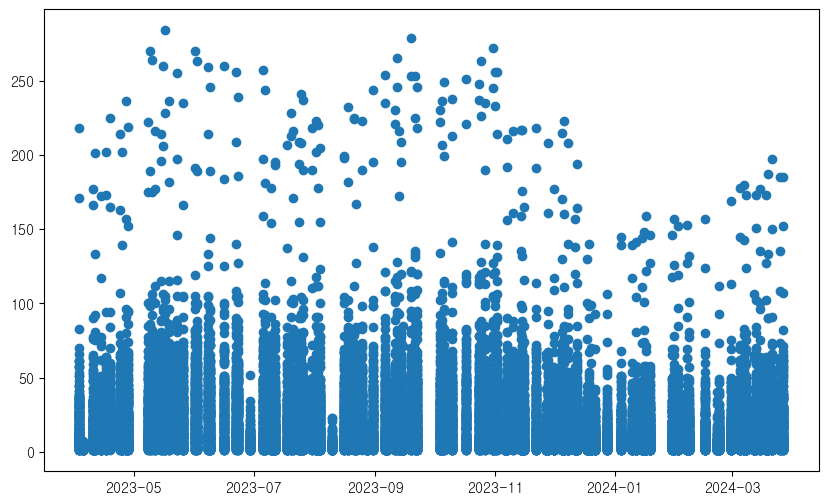

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(출근대여['기준_날짜'], 출근대여['전체_건수'])

In [20]:
import plotly.express as px

fig = px.scatter(x = 출근대여['기준_날짜'], y = 출근대여['전체_건수'])

fig.show()

c:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [21]:
출퇴근_이용량_통합 = pd.read_csv('./출퇴근_이용량_통합.csv',encoding='utf-8')
출퇴근_이용량_통합

,Unnamed: 0,대여소_ID,출근대여량,출근반납량,대여-반납량_출근,차이절대값_출근,총이용량_출근,퇴근대여량,퇴근반납량,대여-반납량_퇴근,차이절대값_퇴근,총이용량_퇴근,출퇴근_총이용량,최종용도
0,0,ST-1062,3743,2281,1462,1462,6024,3947,5456,-1509,1509,9403,15427,주거
1,1,ST-1063,5029,8839,-3810,3810,13868,5795,3170,2625,2625,8965,22833,상업
2,2,ST-1064,3764,8489,-4725,4725,12253,9005,5562,3443,3443,14567,26820,상업
3,3,ST-1065,5860,5507,353,353,11367,14431,16569,-2138,2138,31000,42367,주거
4,4,ST-1067,3394,2906,488,488,6300,2666,3654,-988,988,6320,12620,주거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,ST-831,2756,1529,1227,1227,4285,3970,4425,-455,455,8395,12680,주거
191,191,ST-834,3297,4316,-1019,1019,7613,6179,6293,-114,114,12472,20085,주거
192,192,ST-835,4264,2058,2206,2206,6322,5461,7917,-2456,2456,13378,19700,주거
193,193,ST-975,2954,2508,446,446,5462,7355,8050,-695,695,15405,20867,주거


In [22]:
상업대여소 = 출퇴근_이용량_통합[출퇴근_이용량_통합['최종용도'] == '상업']

In [23]:
len(상업대여소['대여소_ID'])

66

In [24]:
상업지구출근대여 = 출근대여[출근대여['시작_대여소_ID'].isin(상업대여소['대여소_ID'])]

In [25]:
상업지구출근대여.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7002 entries, 1 to 21469
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   기준_날짜      7002 non-null   datetime64[ns]
 1   시작_대여소_ID  7002 non-null   object        
 2   전체_건수      7002 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 218.8+ KB


In [26]:
상업지구출근대여 = 상업지구출근대여.reset_index()

In [27]:
# 상업지구출근대여['기준_날짜'] = pd.to_datetime(상업지구출근대여['기준_날짜'])

In [28]:
상업지구출근대여.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      7002 non-null   int64         
 1   기준_날짜      7002 non-null   datetime64[ns]
 2   시작_대여소_ID  7002 non-null   object        
 3   전체_건수      7002 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 218.9+ KB


In [29]:
상업지구출근대여

,index,기준_날짜,시작_대여소_ID,전체_건수
0,1,2023-04-03,ST-1063,61
1,2,2023-04-03,ST-1064,34
2,6,2023-04-03,ST-1249,45
3,7,2023-04-03,ST-1250,4
4,9,2023-04-03,ST-1252,1
...,...,...,...,...
6997,21451,2024-03-27,ST-3259,1
6998,21452,2024-03-27,ST-3260,4
6999,21453,2024-03-27,ST-3261,8
7000,21464,2024-03-27,ST-516,31


In [30]:
def format_date(date_str):
    date_value = pd.to_datetime(date_str)
    return date_value.strftime('%y%m%d')

temp = 상업지구출근대여['기준_날짜'].apply(format_date)

In [31]:
temp

0       230403
1       230403
2       230403
3       230403
4       230403
         ...  
6997    240327
6998    240327
6999    240327
7000    240327
7001    240327
Name: 기준_날짜, Length: 7002, dtype: object

In [32]:
상업지구출근대여['기준_날짜'] = temp

In [33]:
상업지구출근대여

,index,기준_날짜,시작_대여소_ID,전체_건수
0,1,230403,ST-1063,61
1,2,230403,ST-1064,34
2,6,230403,ST-1249,45
3,7,230403,ST-1250,4
4,9,230403,ST-1252,1
...,...,...,...,...
6997,21451,240327,ST-3259,1
6998,21452,240327,ST-3260,4
6999,21453,240327,ST-3261,8
7000,21464,240327,ST-516,31


In [34]:
상업지구출근대여.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      7002 non-null   int64 
 1   기준_날짜      7002 non-null   object
 2   시작_대여소_ID  7002 non-null   object
 3   전체_건수      7002 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 218.9+ KB


상업지구 출근대여 건수 확인 >> 100건을 기준으로 두 그룹으로 나눠진다고 가정

In [35]:
import plotly.express as px

fig = px.scatter(x = 상업지구출근대여['index'], y = 상업지구출근대여['전체_건수'])

fig.show()

100을 기준으로 두그룹으로 나눠보자

In [36]:
temp100low = 상업지구출근대여[상업지구출근대여['전체_건수'] <= 100]

In [37]:
fig = px.scatter(x = temp100low['index'], y = temp100low['전체_건수'])

fig.show()

In [38]:
temp100high = 상업지구출근대여[상업지구출근대여['전체_건수'] >= 100]

In [39]:
temp100high.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 21 to 6961
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      104 non-null    int64 
 1   기준_날짜      104 non-null    object
 2   시작_대여소_ID  104 non-null    object
 3   전체_건수      104 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 4.1+ KB


In [40]:
fig = px.scatter(x = temp100high['index'], y = temp100high['전체_건수'])

fig.show()

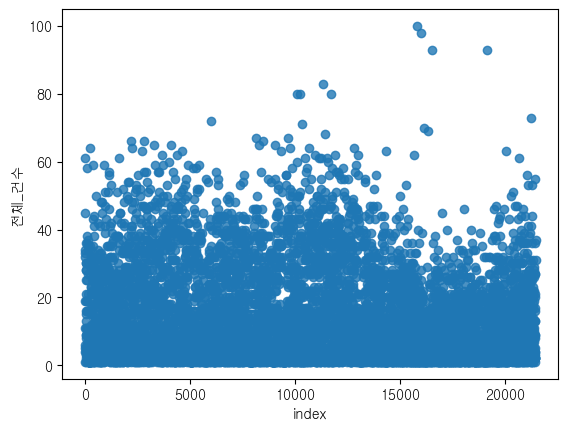

In [41]:
import seaborn as sns

ax = sns.regplot(x = 'index', y = '전체_건수', data=temp100low)


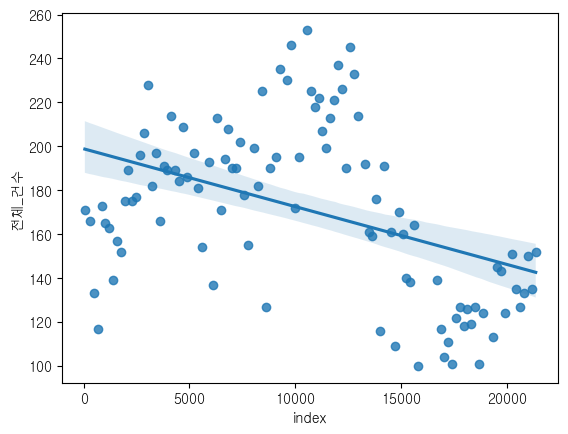

In [42]:
import seaborn as sns

ax = sns.regplot(x = 'index', y = '전체_건수', data=temp100high)

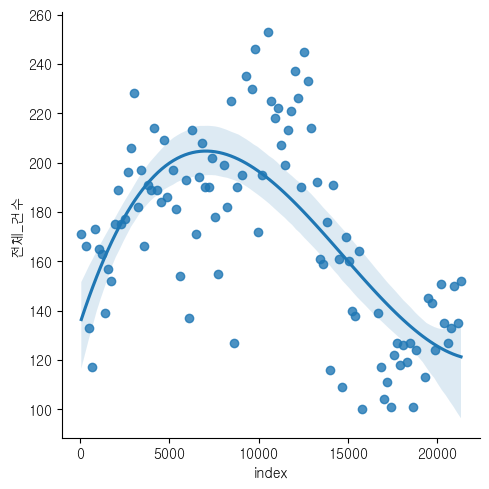

In [43]:
ax = sns.lmplot(x = 'index', y = '전체_건수', data=temp100high, order=3)

In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# 예시 데이터 생성
X = temp100high['index'].values.reshape(-1, 1)
y = temp100high['전체_건수']

# 다항 회귀 모델 설정
poly = PolynomialFeatures(degree=3)  # 추세선의 차수를 3으로 설정
X_poly = poly.fit_transform(X)

# 회귀 분석 결과 요약 구하는 코드
model = sm.OLS(y, X_poly)

result = model.fit()

print(result.summary())

print('-'*150)

# 회귀식 구하는 코드

# 다항 회귀 모델 설정
poly = PolynomialFeatures(degree=3)  # 추세선의 차수를 3으로 설정
X_poly = poly.fit_transform(X)

# 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, y)

# 회귀식 출력
print("회귀식:", model.intercept_, "+", model.coef_[1], "* x +", model.coef_[2], "* x^2 +", model.coef_[3], "* x^3")


                            OLS Regression Results                            
Dep. Variable:                  전체_건수   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     33.10
Date:                Tue, 07 May 2024   Prob (F-statistic):           6.07e-15
Time:                        15:06:05   Log-Likelihood:                -491.00
No. Observations:                 104   AIC:                             990.0
Df Residuals:                     100   BIC:                             1001.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        135.1707     10.413     12.981      0.0

In [45]:
x= 667
print(135.17074533830615 + (0.022046303997284345) * x + (-2.057228881590239e-06) * (x**2) + (4.656757730918565e-11) * (x**3))

148.9742101123283


In [46]:
print(temp100high[:5])

     index   기준_날짜 시작_대여소_ID  전체_건수
21      56  230403   ST-2031    171
98     309  230410   ST-2031    166
158    489  230411   ST-2031    133
215    667  230414   ST-2031    117
274    849  230417   ST-2031    173


In [47]:
temp100high['diff'] = temp100high['전체_건수'].diff()

C:\Users\USER\AppData\Local\Temp\ipykernel_15592\4153104815.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
temp100high

,index,기준_날짜,시작_대여소_ID,전체_건수,diff
21,56,230403,ST-2031,171,NaN
98,309,230410,ST-2031,166,-5.0
158,489,230411,ST-2031,133,-33.0
215,667,230414,ST-2031,117,-16.0
274,849,230417,ST-2031,173,56.0
...,...,...,...,...,...
6712,20618,240318,ST-2031,127,-8.0
6774,20804,240319,ST-2031,133,6.0
6836,20988,240321,ST-2031,150,17.0
6900,21174,240325,ST-2031,135,-15.0


In [49]:
len(temp100high)

104

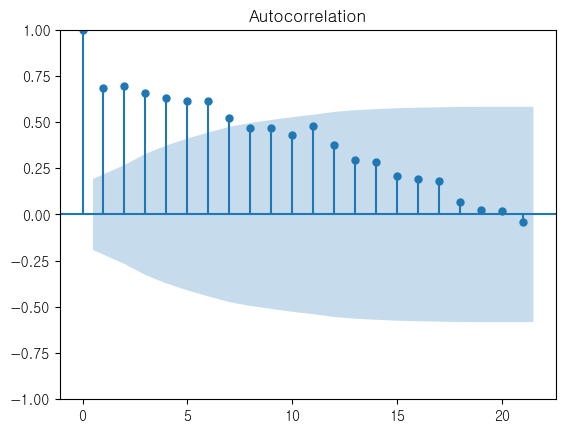

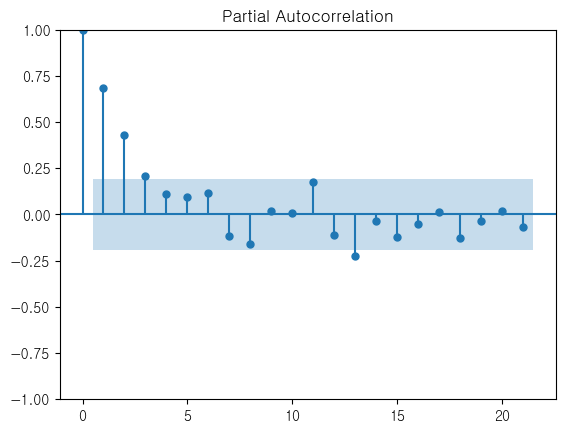

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



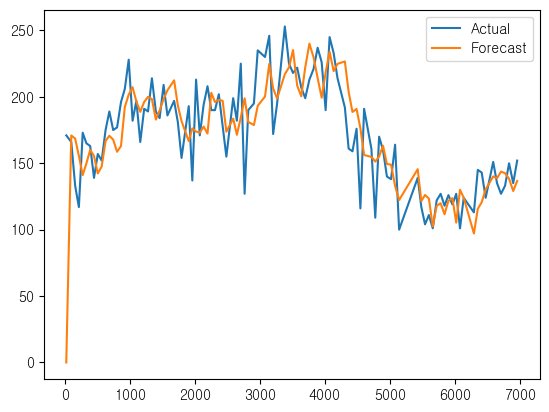

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(temp100high['전체_건수'])
plot_pacf(temp100high['전체_건수'])
plt.show()

model = ARIMA(temp100high['전체_건수'], order=(20, 1, 0))  # p, d, q는 선택한 파라미터입니다.
results = model.fit()

forecast = results.predict(start=0, end=len(temp100high)-1, typ='levels')

plt.plot(temp100high['전체_건수'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [51]:
len(temp100low)

6899

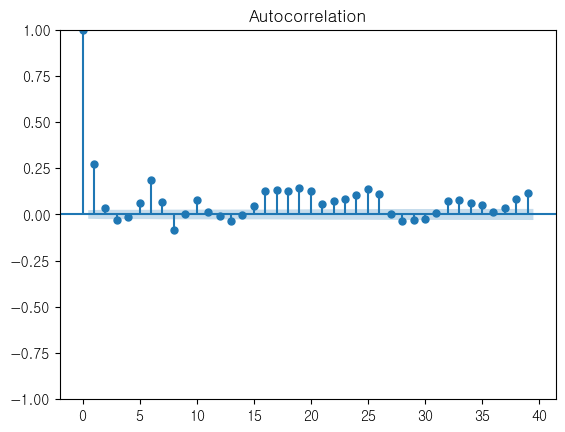

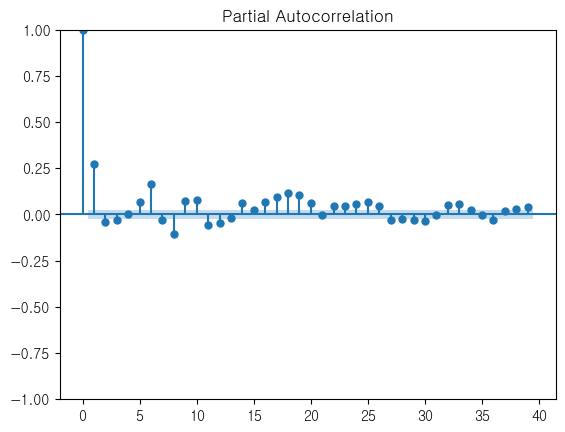

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



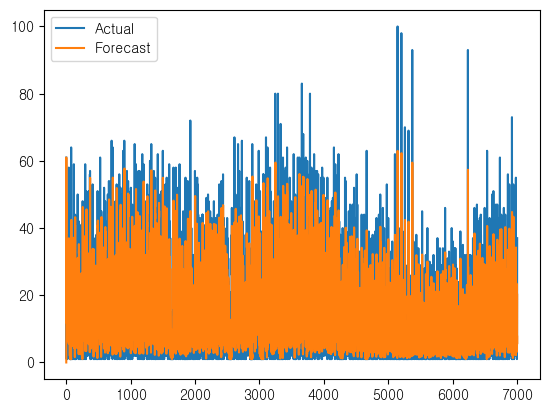

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(temp100low['전체_건수'])
plot_pacf(temp100low['전체_건수'])
plt.show()

model = ARIMA(temp100low['전체_건수'], order=(2, 1, 0))  # p, d, q는 선택한 파라미터입니다.
results = model.fit()

forecast = results.predict(start=0, end=len(temp100low)-1, typ='levels')

plt.plot(temp100low['전체_건수'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [53]:
상업지구출근대여

,index,기준_날짜,시작_대여소_ID,전체_건수
0,1,230403,ST-1063,61
1,2,230403,ST-1064,34
2,6,230403,ST-1249,45
3,7,230403,ST-1250,4
4,9,230403,ST-1252,1
...,...,...,...,...
6997,21451,240327,ST-3259,1
6998,21452,240327,ST-3260,4
6999,21453,240327,ST-3261,8
7000,21464,240327,ST-516,31


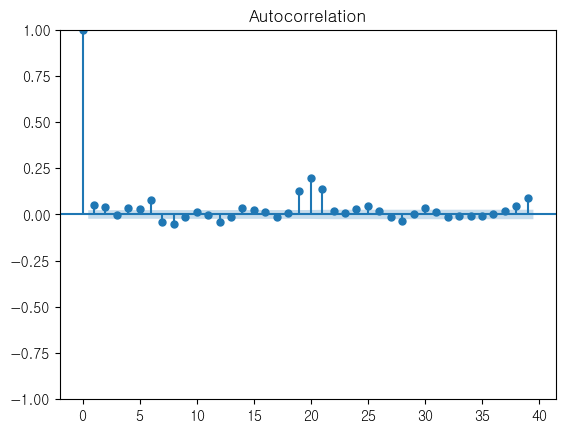

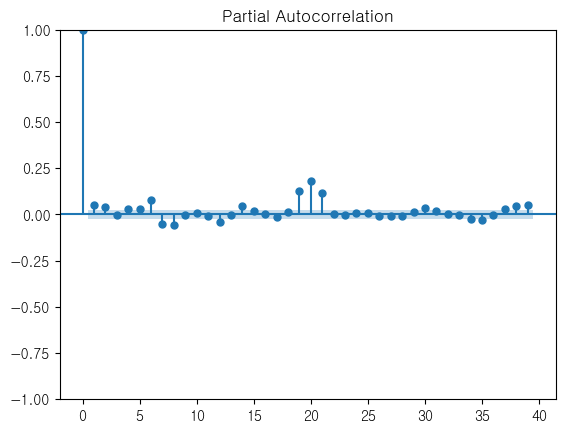

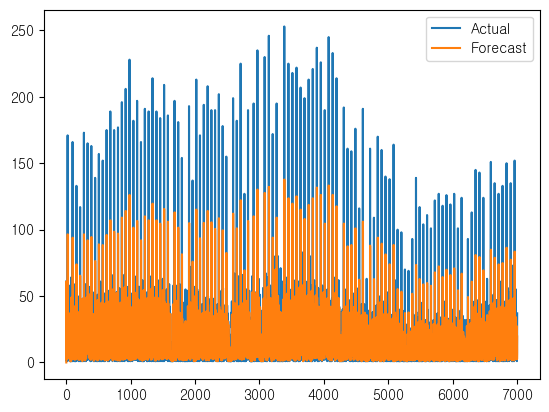

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(상업지구출근대여['전체_건수'])
plot_pacf(상업지구출근대여['전체_건수'])
plt.show()

model = ARIMA(상업지구출근대여['전체_건수'], order=(1, 1, 0))  # p, d, q는 선택한 파라미터입니다.
results = model.fit()

forecast = results.predict(start=0, end=len(상업지구출근대여)-1, typ='levels')

plt.plot(상업지구출근대여['전체_건수'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [55]:
import plotly.express as px

fig = px.box(data_frame= 상업지구출근대여, y="전체_건수")

fig.show()

In [56]:
import plotly.graph_objs as go

# 산점도 데이터 생성
trace = go.Scatter(
    x=상업지구출근대여['index'],
    y=상업지구출근대여['전체_건수'],
    mode='markers',
    text=상업지구출근대여['시작_대여소_ID'],  # 마우스 호버링 시 표시될 텍스트
    hoverinfo='text',  # 마우스 호버링 시 텍스트 정보만 표시
)

# 레이아웃 설정
layout = go.Layout(
    title='Scatter plot with hover text',
    xaxis=dict(title='X-axis'),
    yaxis=dict(title='Y-axis'),
)

# 그래프 객체 생성
fig = go.Figure(data=[trace], layout=layout)

# 그래프 출력
fig.show()

In [57]:
temp_df = 상업지구출근대여.copy()
temp_df


temp_df['전체_건수'] = temp_df['전체_건수'].apply(lambda x: 54 if x > 54 else x)

import plotly.express as px

fig = px.box(data_frame= temp_df, y="전체_건수")

fig.show()

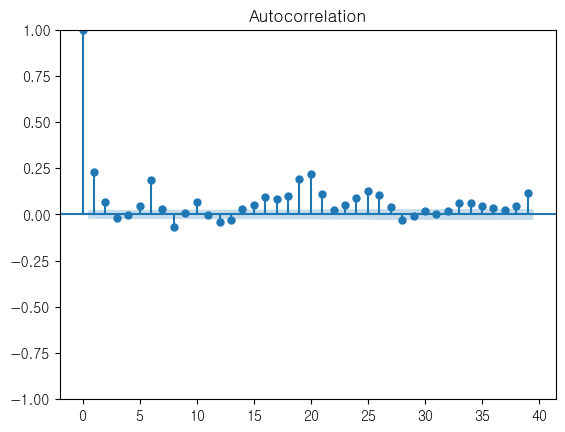

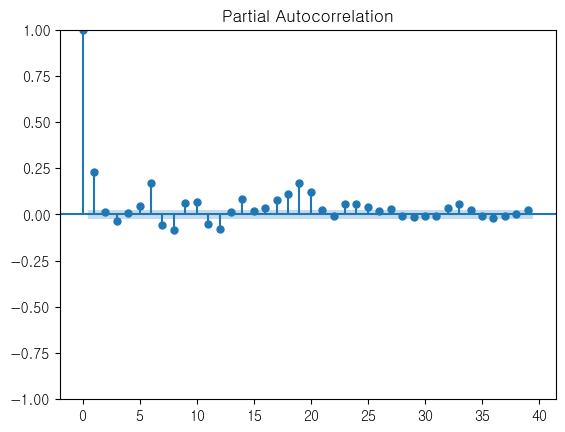

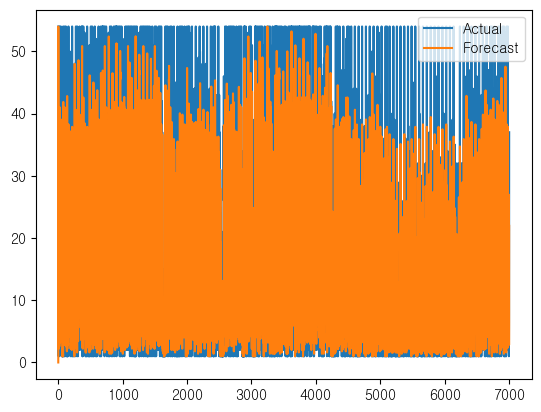

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(temp_df['전체_건수'])
plot_pacf(temp_df['전체_건수'])
plt.show()

model = ARIMA(temp_df['전체_건수'], order=(1, 1, 0))  # p, d, q는 선택한 파라미터입니다.
results = model.fit()

forecast = results.predict(start=0, end=len(temp_df)-1, typ='levels')

plt.plot(temp_df['전체_건수'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 데이터 표준화
scaled_data = scaler.fit_transform(상업지구출근대여)

print("Scaled Data:")
print(scaled_data)

ValueError: could not convert string to float: 'ST-1063'